In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

In [2]:
s = pd.read_csv (r'C:\\Users\\Master Ridwan\\Desktop\\my data\\superstore_c.csv', header = 0)

In [3]:
s.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [4]:
s.shape

(9800, 18)

In [5]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
s.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
store = s

In [8]:
store.dropna( inplace= True)

In [9]:
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Dropping some column i think are not useful

In [10]:

store.drop(['Order ID', 'Row ID', 'Customer ID', 'Country'], axis= 1, inplace =True )

In [11]:
store.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Lets change the date Dtype to datetime

In [12]:
def change_into_datetime(col):
    store[col]=pd.to_datetime(store[col])

for feature in ['Order Date' , 'Ship Date']:
    change_into_datetime(feature)

In [13]:
store.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [14]:
store ['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [15]:
store ['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

I created a seperate column for order_year, order_month, order_day

In [16]:
store['Order Year'] =store['Order Date'].dt.strftime('%Y')

In [17]:
store['Order Month'] = store['Order Date'].dt.strftime('%m')

In [18]:
store['Order Day'] = store['Order Date'].dt.strftime('%d')

I created a seperate column for shipping_year, shipping_month, shipping_day

In [19]:
store['Ship Year'] =store['Ship Date'].dt.strftime('%Y')

In [20]:
store['Ship Month'] =store['Ship Date'].dt.strftime('%m')

In [21]:
store['Ship Day'] =store['Ship Date'].dt.strftime('%d')

In [22]:
store.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,08,11,2017,11,11
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,08,11,2017,11,11
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,06,2017,06,16
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,2016,10,18
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,2016,10,18


In [27]:
store.dtypes

Ship Mode         object
Customer Name     object
Segment           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Order Year        object
Order Month       object
Order Day         object
Ship Year         object
Ship Month        object
Ship Day          object
dtype: object

Converting the Dtype of newly created column to integer

In [26]:
def change_dtype(col):
    store[col]=store[col].astype('int')

for feature in ['Order Day' ,'Order Month', 'Order Year',  'Ship Day', 'Ship Month', 'Ship Year']:
    change_dtype(feature)

In [27]:
store.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Order Year                int32
Order Month               int32
Order Day                 int32
Ship Year                 int32
Ship Month                int32
Ship Day                  int32
dtype: object

In [132]:
store['Sales'].describe()

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

Which shipping mode is mostly used?

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

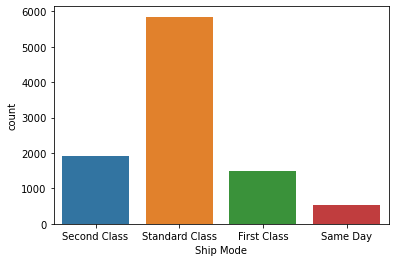

In [32]:
sns.countplot(x = 'Ship Mode', data = store)

In [32]:
store['Ship Mode'].value_counts()

Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [33]:
def ship_mode_mostly_used_by (col):
    fig = sns.countplot(x = 'Ship Mode', hue = col, data = store)
    return fig

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

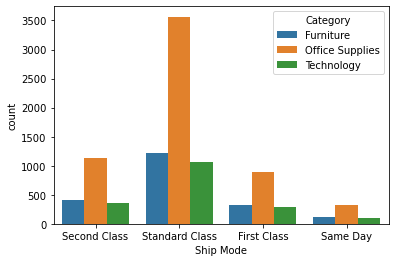

In [34]:
ship_mode_mostly_used_by('Category')

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

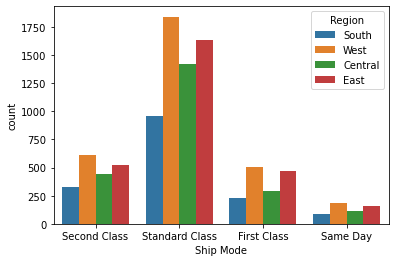

In [35]:
ship_mode_mostly_used_by('Region')

In [37]:
store['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

Consumer appear more frequently


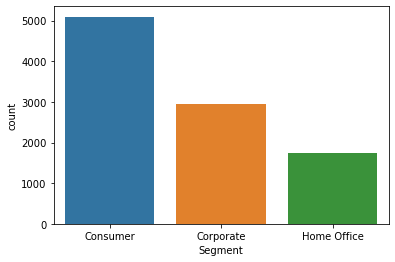

In [38]:
sns.countplot(x = 'Segment', data = store)
print ('Consumer appear more frequently')

In [39]:
store['Segment'].value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

In [41]:

print('Items are highly purchased by the residence of Califonia and least Purchased by the residence Wyoming')
store['State'].value_counts()


Goods are mostly bought by the residence of Califonia


California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Massachusetts            135
Indiana                  135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [41]:
print('William Brown purchase most Goods Item')
store['Customer Name'].value_counts()

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Ricardo Emerson         1
Lela Donovan            1
Carl Jackson            1
Sung Chung              1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64

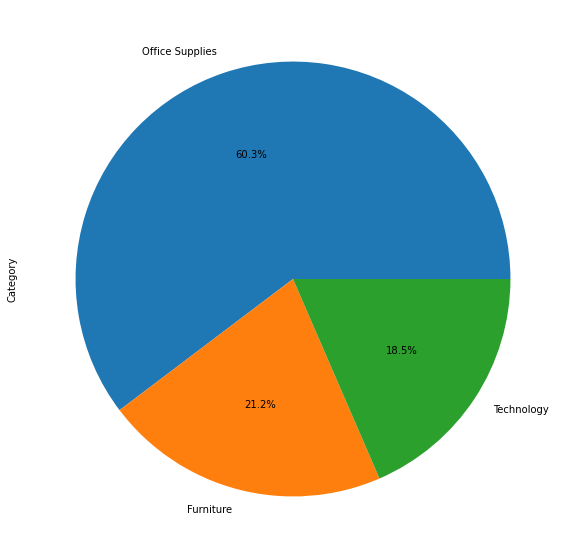

This shows that office product are the most purchased Item


In [48]:
plt.figure(figsize=(10,10))
s['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

print ('This shows that office product are the most purchased Item')

In [47]:

store['Category'].value_counts()

Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64

In [44]:
store["Sub-Category"].unique()


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

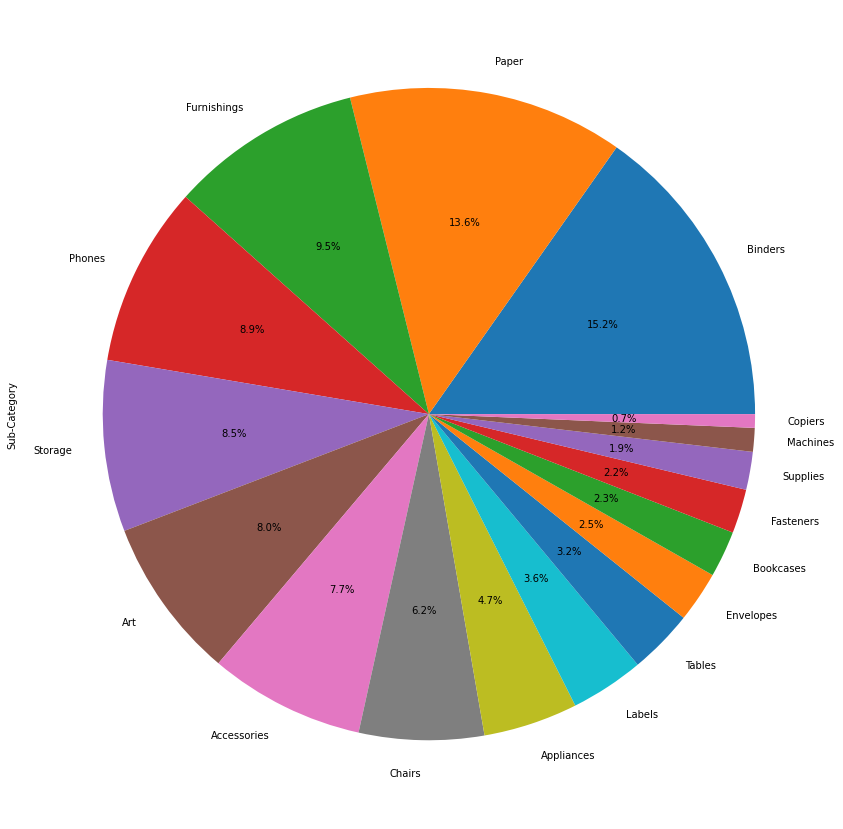

Of all the Sub-category, the Binders are the most purchased items


In [51]:

plt.figure(figsize=(18,15))
store['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

print('Of all the Sub-category, the Binders are the most purchased items')

In [49]:

store["Sub-Category"].value_counts()


Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [47]:
store["Product Name"].unique()


array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], dtype=object)

In [48]:
product_name=s['Product Name'].value_counts().head(10)
product_name

Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64

How long did it take for the goods to be shipped? 

In [53]:
store['Ship_Day_Duration']=abs(store['Order Date']-store['Ship Date'])
store['Ship_Day_Duration']

0       92 days
1       92 days
2      173 days
3       23 days
4       23 days
         ...   
9795     7 days
9796   319 days
9797   319 days
9798   319 days
9799   319 days
Name: Ship_Day_Duration, Length: 9789, dtype: timedelta64[ns]

In [58]:
store.tail()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Product ID,...,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day,Ship_Day_Duration
9795,2017-05-21,2017-05-28,Standard Class,William Brown,Corporate,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,...,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,2017,5,21,2017,5,28,7 days
9796,2016-12-01,2016-01-17,Standard Class,William Brown,Corporate,Toledo,Ohio,43615.0,East,OFF-AR-10001374,...,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,2016,12,1,2016,1,17,319 days
9797,2016-12-01,2016-01-17,Standard Class,William Brown,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10004977,...,Phones,GE 30524EE4,235.188,2016,12,1,2016,1,17,319 days
9798,2016-12-01,2016-01-17,Standard Class,William Brown,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10000912,...,Phones,Anker 24W Portable Micro USB Car Charger,26.376,2016,12,1,2016,1,17,319 days
9799,2016-12-01,2016-01-17,Standard Class,William Brown,Corporate,Toledo,Ohio,43615.0,East,TEC-AC-10000487,...,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,2016,12,1,2016,1,17,319 days


Check out for the city, shipping mode and ship_day_duration

In [133]:

store.iloc[:,[2,5,20]]


,Ship Mode,City,Ship_Day_Duration
0,Second Class,Henderson,92 days
1,Second Class,Henderson,92 days
2,Second Class,Los Angeles,173 days
3,Standard Class,Fort Lauderdale,23 days
4,Standard Class,Fort Lauderdale,23 days
...,...,...,...
9795,Standard Class,Chicago,7 days
9796,Standard Class,Toledo,319 days
9797,Standard Class,Toledo,319 days
9798,Standard Class,Toledo,319 days


In [85]:
def num_of_sales(col):
    max = store.groupby(col)["Sales"].nunique()
    max_desc = max.sort_values(ascending = False)
    return max_desc

In [61]:
def num_of_sales_vir(col):
    plt.figure(figsize=(12,10))
    store.groupby(col)["Sales"].nunique().plot.pie(autopct="%1.1f%%")
    plt.show()


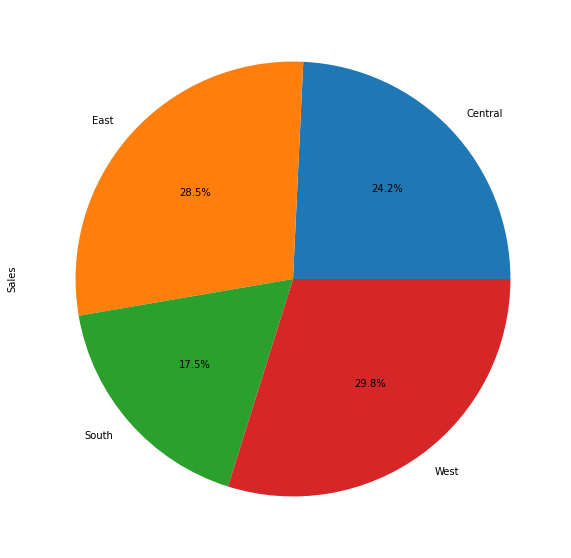

The centre tend to make the highest purchase of product


In [63]:
num_of_sales_vir('Region')

print ('The west tends to make the highest purchase of product')

In [86]:
num_of_sales('Region')

Region
West       2317
East       2210
Central    1883
South      1356
Name: Sales, dtype: int64

In [90]:
def max_sales(col):
    max = store.groupby(col)["Sales"].max()
    max_desc = max.sort_values(ascending = False)
    return max_desc

In [91]:
print('The South region has the maximum purchase value of item')
max_sales('Region')



The central region has the maximum sales of item


Region
South      22638.480
Central    17499.950
West       13999.960
East       11199.968
Name: Sales, dtype: float64

In [96]:
def min_sales(col):
    min = store.groupby(col)["Sales"].min()
    min_desc = min.sort_values(ascending = True)
    return min_desc

In [97]:
print('The central region has the minimum purchase value of item')
min_sales('Region')

The central region has the minimum sales of item


Region
Central    0.444
East       0.852
West       0.990
South      1.167
Name: Sales, dtype: float64

In [98]:
num_of_sales('State')

print('Residence of Califonia have the highest purchase number of items')

State
California              1500
New York                 938
Texas                    838
Pennsylvania             518
Washington               459
Illinois                 451
Ohio                     427
Florida                  347
Michigan                 237
North Carolina           234
Arizona                  215
Virginia                 210
Tennessee                176
Colorado                 176
Georgia                  168
Kentucky                 135
Indiana                  134
Massachusetts            129
New Jersey               121
Oregon                   117
Wisconsin                105
Maryland                 104
Delaware                  91
Minnesota                 86
Connecticut               80
Missouri                  64
Oklahoma                  64
Alabama                   61
Arkansas                  58
Mississippi               53
Rhode Island              53
Utah                      53
South Carolina            40
Louisiana                 39
Nevada  

In [100]:

print('Residence of Florida have the maximum purchase value of items')
max_sales('State')

Residence of Florida have the highest purchase


State
Florida                 22638.480
Indiana                 17499.950
Washington              13999.960
New York                11199.968
Delaware                10499.970
Michigan                 9892.740
Minnesota                9449.950
New Jersey               9099.930
Virginia                 8749.950
Pennsylvania             8399.976
California               8187.650
Texas                    8159.952
North Carolina           7999.980
Georgia                  6354.950
Rhode Island             5399.910
Missouri                 4899.930
Nevada                   4535.976
Ohio                     4499.985
Kentucky                 3080.000
Alabama                  3040.000
Montana                  2999.950
Wisconsin                2807.840
Illinois                 2799.960
Colorado                 2549.985
Maryland                 2541.980
Nebraska                 2479.960
Mississippi              2430.080
Tennessee                2314.116
New Hampshire            2249.910
Arizona 

In [109]:
min_sales('State')

print9('residence of texas have the minimum purchase value of item')

State
Texas                      0.444
Illinois                   0.836
Pennsylvania               0.852
California                 0.990
Oregon                     1.080
Colorado                   1.080
Florida                    1.167
New York                   1.240
Washington                 1.344
Arizona                    1.408
Ohio                       1.448
Tennessee                  1.584
Maryland                   1.640
North Carolina             1.752
Georgia                    1.780
Wisconsin                  1.810
Indiana                    1.980
Michigan                   2.200
Rhode Island               2.220
North Dakota               2.480
Kentucky                   2.610
Virginia                   2.840
South Dakota               2.970
Massachusetts              3.150
Idaho                      3.304
Delaware                   3.380
Connecticut                3.520
Oklahoma                   3.520
Alabama                    3.620
Nevada                     3.640
Minn

check which category have the highest purchase number

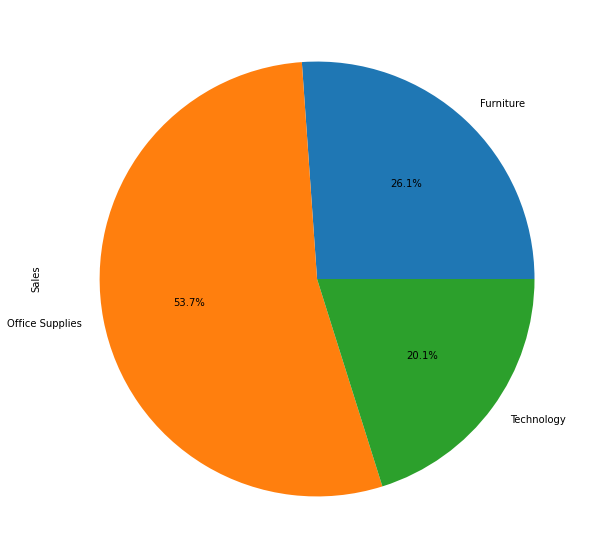

In [65]:
num_of_sales_vir('Category')

print('this show that office supply have the highest purchase number')

In [101]:
num_of_sales('Category')

Category
Office Supplies    3311
Furniture          1609
Technology         1241
Name: Sales, dtype: int64

In [93]:
store['Order Month'].value_counts()
print ('Order was quite much in the month of November compared to other months')

11    1194
9     1116
12    1065
5      817
10     801
8      798
3      797
7      723
4      691
6      683
1      568
2      536
Name: Order Month, dtype: int64

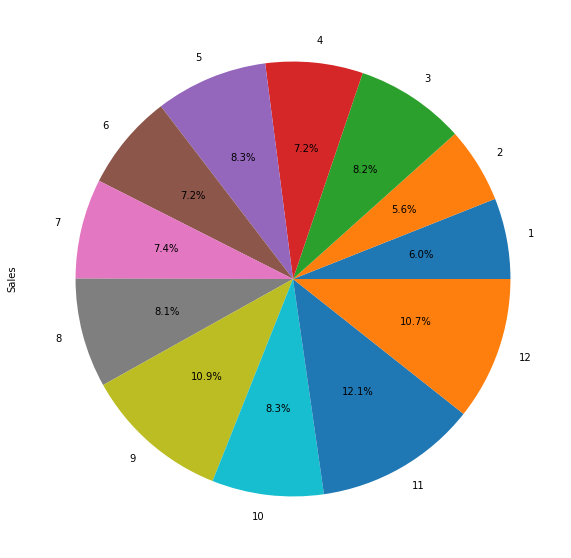

The month of November has the highest number of sale


In [111]:
num_of_sales_vir('Order Month')

print ('The month of November has the highest number of sale')

In [110]:
num_of_sales('Order Month')

The month of November has the highest number of sale


Order Month
11    1079
9      971
12     952
5      746
10     742
3      731
8      727
7      664
4      647
6      639
1      537
2      502
Name: Sales, dtype: int64

In [106]:
store['Order Year'].value_counts()
print ('There were more order in the year 2018 compared to other years')

2018    3253
2017    2530
2016    2053
2015    1953
Name: Order Year, dtype: int64

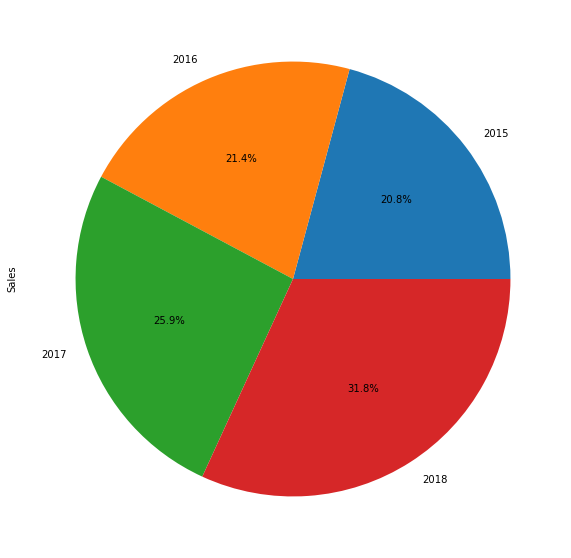

In [81]:
num_of_sales_vir('Order Year')
print ('there were more sale in the year 2018 compared to other years')

In [108]:
num_of_sales('Order Year')

Order Year
2018    2518
2017    2051
2016    1692
2015    1645
Name: Sales, dtype: int64

check out the Order year and the number of sales from each category

In [117]:
def num_of_sale(col):
    max = store.groupby(col)["Sales"].nunique()
    return max

In [114]:
num_of_sale(['Order Year', 'Category'])

Order Year  Category       
2015        Furniture           389
            Office Supplies     976
            Technology          317
2016        Furniture           407
            Office Supplies     973
            Technology          358
2017        Furniture           501
            Office Supplies    1215
            Technology          388
2018        Furniture           609
            Office Supplies    1489
            Technology          523
Name: Sales, dtype: int64

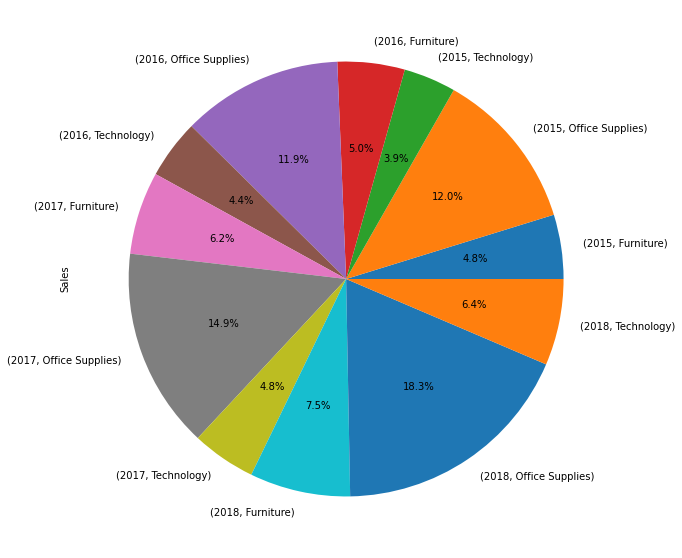

In [92]:
num_of_sales_vir(['Order Year', 'Category'])
   

Lets take a look a each month and the number of sales we have from each category

In [118]:
num_of_sale(['Order Month', 'Category'])

Order Month  Category       
1            Furniture          123
             Office Supplies    316
             Technology         100
2            Furniture          101
             Office Supplies    302
             Technology         104
3            Furniture          168
             Office Supplies    424
             Technology         145
4            Furniture          151
             Office Supplies    395
             Technology         106
5            Furniture          159
             Office Supplies    450
             Technology         142
6            Furniture          135
             Office Supplies    384
             Technology         123
7            Furniture          155
             Office Supplies    376
             Technology         138
8            Furniture          159
             Office Supplies    437
             Technology         137
9            Furniture          207
             Office Supplies    605
             Technology         173

Lets take a look at each segment and the number of purchase of each category

In [116]:
num_of_sale(['Segment', 'Category'])

Segment      Category       
Consumer     Furniture           943
             Office Supplies    2104
             Technology          731
Corporate    Furniture           578
             Office Supplies    1373
             Technology          471
Home Office  Furniture           341
             Office Supplies     865
             Technology          312
Name: Sales, dtype: int64

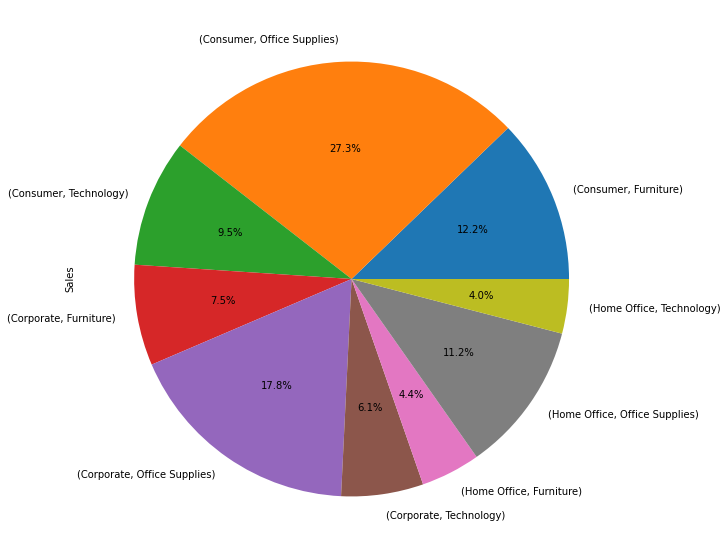

In [99]:
num_of_sales_vir(['Segment', 'Category'])

In [124]:
store.groupby('Ship Mode')['Ship_Day_Duration'].nunique()

Ship Mode
First Class        50
Same Day            6
Second Class       80
Standard Class    112
Name: Ship_Day_Duration, dtype: int64

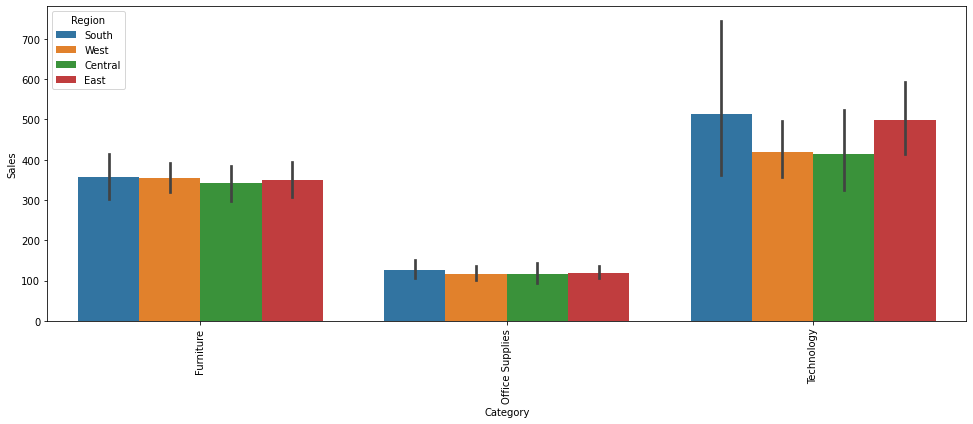

In [42]:
plt.figure (figsize = (40, 6))
plt.subplot (1,3,2)
sns.barplot (y =  "Sales" , x = "Category" , hue = "Region", data = s )
plt.xticks(rotation = 90)
plt.tight_layout()

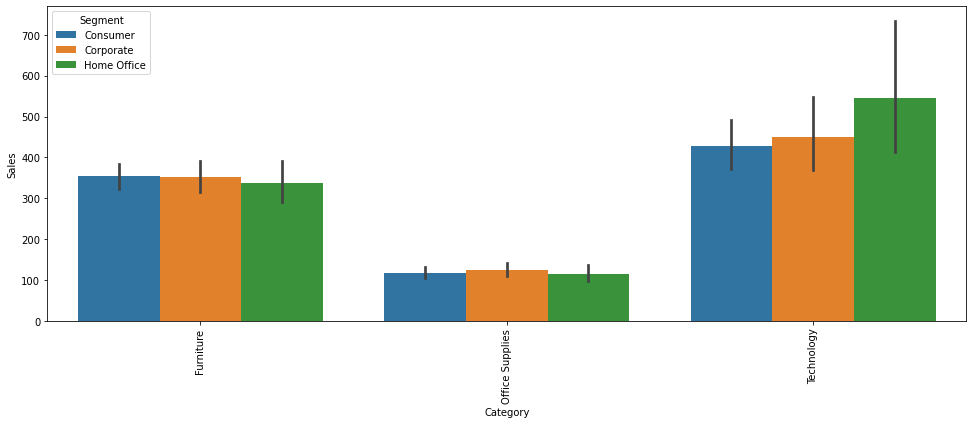

In [43]:
plt.figure (figsize = (40, 6))
plt.subplot (1,3,2)
sns.barplot (y =  "Sales" , x = "Category" , hue = "Segment", data = s )
plt.xticks(rotation = 90)
plt.tight_layout()